In [1]:
%matplotlib inline

# Tree and Ensemble Methods

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [3]:
iris_data, iris_labels = load_iris().data, load_iris().target

In [4]:
iris_data.shape

(150, 4)

In [5]:
iris_labels.shape

(150,)

In [6]:
iris_data_train, iris_data_test, iris_labels_train, iris_labels_test = train_test_split(
    iris_data,
    iris_labels,
    train_size=100,
    stratify=iris_labels
)

In [7]:
iris_data_train.shape, iris_data_test.shape, iris_labels_train.shape, iris_labels_test.shape,

((100, 4), (50, 4), (100,), (50,))

## Decision Trees

Importance:  [0.02047624 0.02047624 0.88632687 0.07272066]
Train score:  1.0
Test score:  0.98


[Text(0.4, 0.9, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 100.0%\nvalue = [0.33, 0.33, 0.34]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 33.0%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 67.0%\nvalue = [0.0, 0.493, 0.507]'),
 Text(0.2, 0.5, 'x[3] <= 1.7\nentropy = 0.422\nsamples = 35.0%\nvalue = [0.0, 0.914, 0.086]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 31.0%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4.0%\nvalue = [0.0, 0.25, 0.75]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3.0%\nvalue = [0.0, 0.0, 1.0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1.0%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\nentropy = 0.201\nsamples = 32.0%\nvalue = [0.0, 0.031, 0.969]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\nentropy = 0.811\nsamples = 4.0%\nvalue = [0.0, 0.25, 0.75]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3.0%\nvalue = [0.0, 0.0, 1.0]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1.0%\nvalue = [0

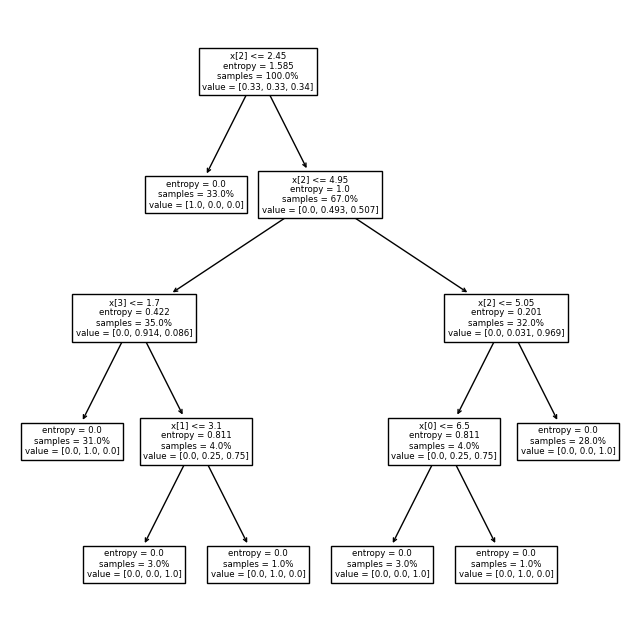

In [8]:
tree = DecisionTreeClassifier(
    criterion="entropy",

)
tree.fit(iris_data_train, iris_labels_train)

print("Importance: ", tree.feature_importances_)
print("Train score: ", tree.score(iris_data_train, iris_labels_train))
print("Test score: ", tree.score(iris_data_test, iris_labels_test))

plt.figure(figsize = (8, 8))
plot_tree(tree, proportion=True)

Importance:  [0.         0.         0.33359061 0.66640939]
Train score:  0.96
Test score:  0.92


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 100.0%\nvalue = [0.33, 0.33, 0.34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 33.0%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 67.0%\nvalue = [0.0, 0.493, 0.507]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.422\nsamples = 35.0%\nvalue = [0.0, 0.914, 0.086]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.201\nsamples = 32.0%\nvalue = [0.0, 0.031, 0.969]')]

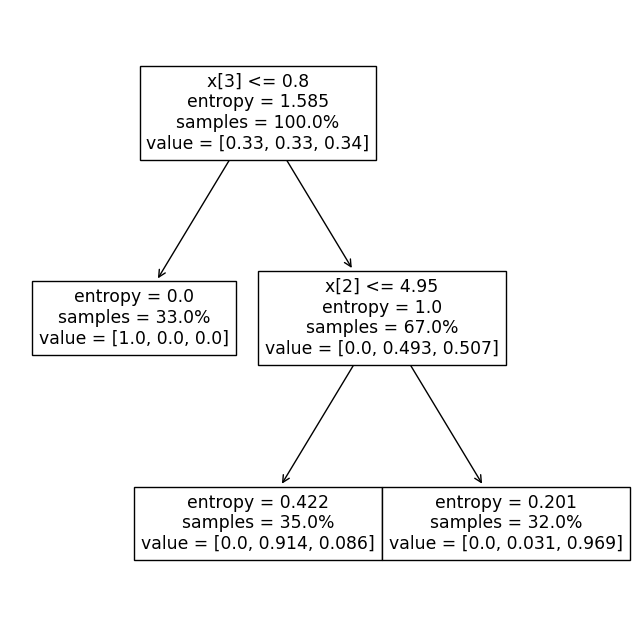

In [9]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=2
)
tree.fit(iris_data_train, iris_labels_train)

print("Importance: ", tree.feature_importances_)
print("Train score: ", tree.score(iris_data_train, iris_labels_train))
print("Test score: ", tree.score(iris_data_test, iris_labels_test))

plt.figure(figsize = (8, 8))
plot_tree(tree, proportion=True)

Importance:  [0.         0.         0.30764167 0.69235833]
Train score:  0.96
Test score:  0.92


[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 100.0%\nvalue = [0.33, 0.33, 0.34]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 33.0%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.5, 0.625, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 67.0%\nvalue = [0.0, 0.493, 0.507]'),
 Text(0.25, 0.375, 'x[3] <= 1.55\nentropy = 0.422\nsamples = 35.0%\nvalue = [0.0, 0.914, 0.086]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 29.0%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 6.0%\nvalue = [0.0, 0.5, 0.5]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\nentropy = 0.201\nsamples = 32.0%\nvalue = [0.0, 0.031, 0.969]'),
 Text(0.625, 0.125, 'entropy = 0.722\nsamples = 5.0%\nvalue = [0.0, 0.2, 0.8]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 27.0%\nvalue = [0.0, 0.0, 1.0]')]

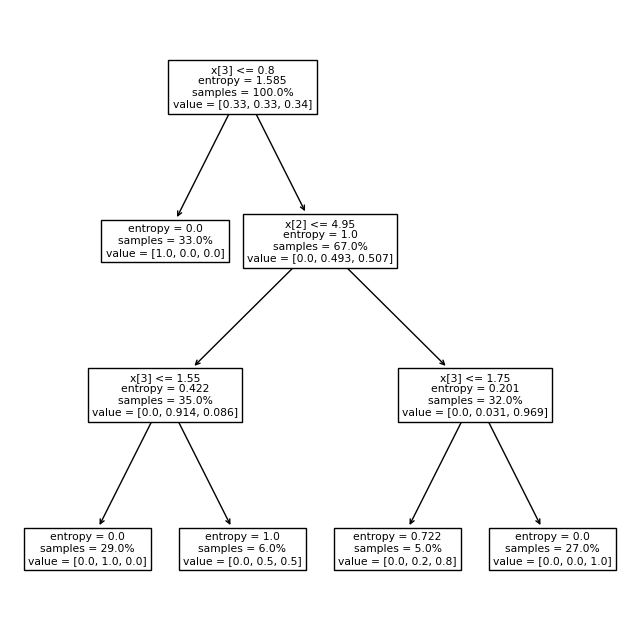

In [10]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    min_samples_leaf=5
)
tree.fit(iris_data_train, iris_labels_train)

print("Importance: ", tree.feature_importances_)
print("Train score: ", tree.score(iris_data_train, iris_labels_train))
print("Test score: ", tree.score(iris_data_test, iris_labels_test))

plt.figure(figsize = (8, 8))
plot_tree(tree, proportion=True)

Importance:  [0.         0.         0.95450831 0.04549169]
Train score:  0.96
Test score:  0.92


[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 100.0%\nvalue = [0.33, 0.33, 0.34]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 33.0%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.5, 0.625, 'x[2] <= 4.95\ngini = 0.5\nsamples = 67.0%\nvalue = [0.0, 0.493, 0.507]'),
 Text(0.25, 0.375, 'x[3] <= 1.55\ngini = 0.157\nsamples = 35.0%\nvalue = [0.0, 0.914, 0.086]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 29.0%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 6.0%\nvalue = [0.0, 0.5, 0.5]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.061\nsamples = 32.0%\nvalue = [0.0, 0.031, 0.969]'),
 Text(0.625, 0.125, 'gini = 0.32\nsamples = 5.0%\nvalue = [0.0, 0.2, 0.8]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 27.0%\nvalue = [0.0, 0.0, 1.0]')]

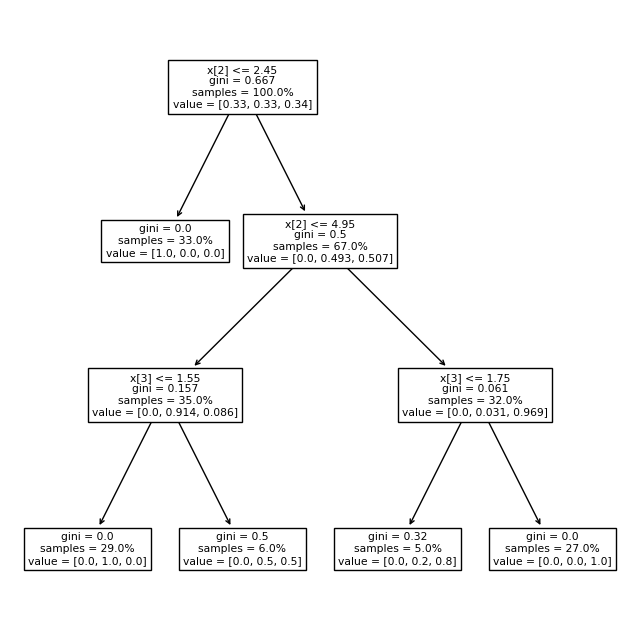

In [11]:
tree = DecisionTreeClassifier(
    criterion="gini",
    min_samples_leaf=5
)
tree.fit(iris_data_train, iris_labels_train)

print("Importance: ", tree.feature_importances_)
print("Train score: ", tree.score(iris_data_train, iris_labels_train))
print("Test score: ", tree.score(iris_data_test, iris_labels_test))

plt.figure(figsize = (8, 8))
plot_tree(tree, proportion=True)

### Visualizing Decision Tree Boundaries 

In [12]:
iris = load_iris()
X = iris.data[:, :2] # Sepal length, sepal width
y = iris.target
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]
depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]


In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

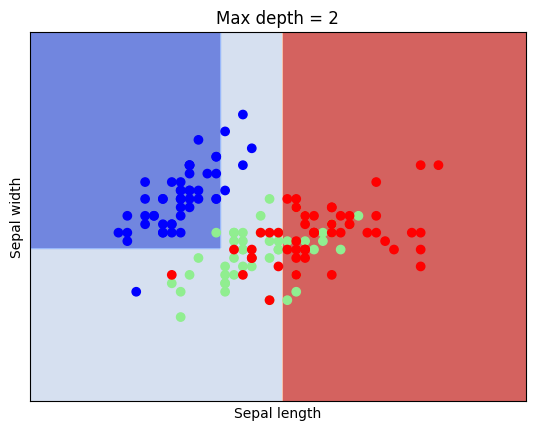

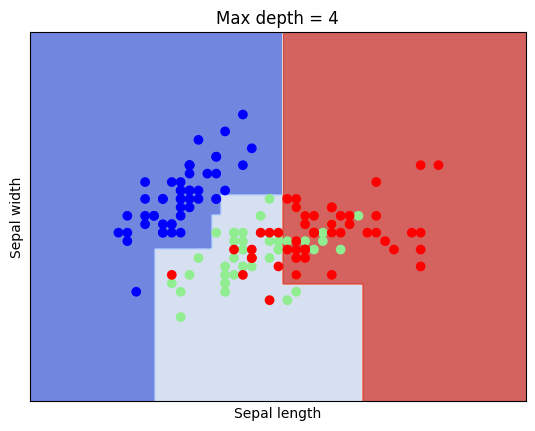

In [14]:
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

In [15]:
iris = load_iris()
X = iris.data[:, 2:] # Sepal length, sepal width
y = iris.target
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]
depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

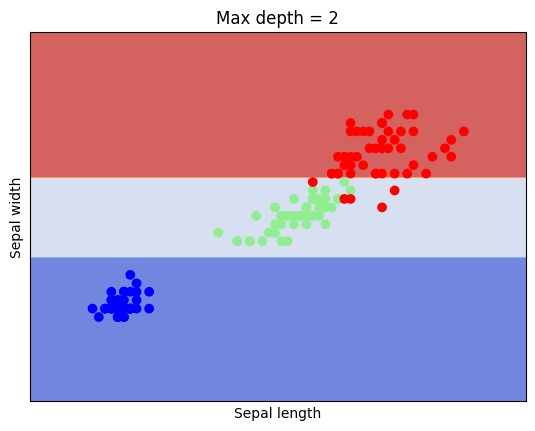

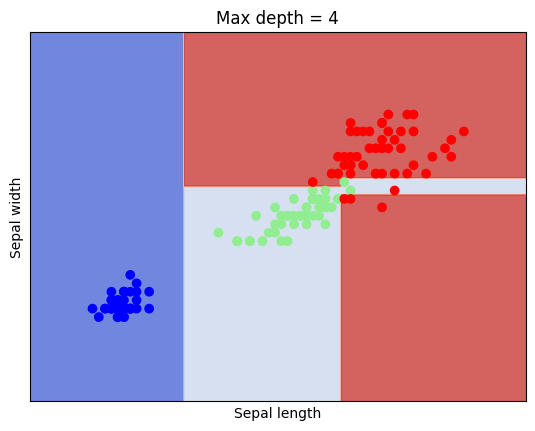

In [17]:
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

## Decision Forests

In [18]:
forest = [
    DecisionTreeClassifier(splitter="random", max_depth=5),
    DecisionTreeClassifier(splitter="random", max_depth=5),
    DecisionTreeClassifier(splitter="random", max_depth=5),
    DecisionTreeClassifier(splitter="random", max_depth=5)
]
forest

[DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random')]

In [19]:
for tree in forest:
    tree.fit(iris_data_train, iris_labels_train)

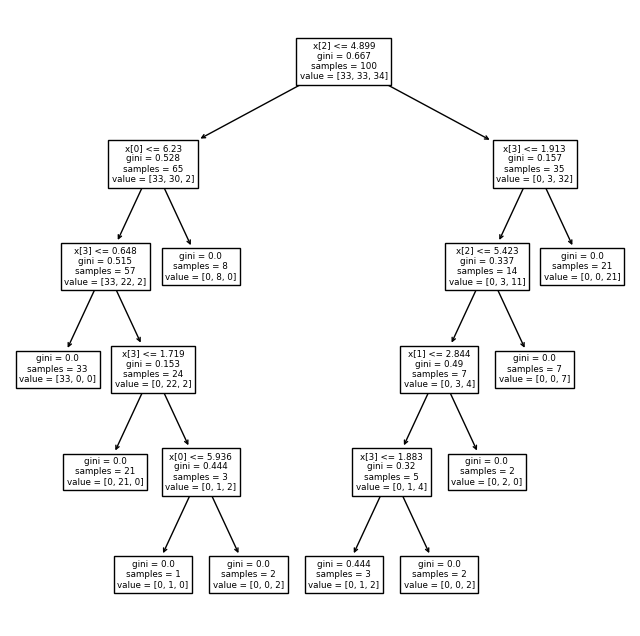

In [20]:
plt.figure(figsize = (8, 8))
plot_tree(forest[0])
plt.show()

### Random Forest

In [21]:
random_forest = RandomForestClassifier(n_estimators = 20)
random_forest.fit(iris_data_train, iris_labels_train)

RandomForestClassifier(n_estimators=20)

In [22]:
random_forest.feature_importances_

array([0.07436313, 0.01615581, 0.49960995, 0.40987111])

### AdaBoost

In [23]:
ada = AdaBoostClassifier(n_estimators=5)
ada.fit(iris_data, iris_labels)

c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=5)

In [24]:
ada.score(iris_data_train, iris_labels_train)

0.98

In [25]:
ada.score(iris_data_test, iris_labels_test)

0.96

In [26]:
ada.estimator_errors_

array([0.33333333, 0.06000226, 0.33335537, 0.12039741, 0.33335419])

### Other Algorithms

In [27]:
adult_data = pd.concat([
    pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None),
    pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', header=None, skiprows=1)
])
adult_data = adult_data.reset_index(drop = True)
adult_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [28]:
adult_attributes = adult_data.drop(columns=[14])
adult_labels = adult_data[14]

In [52]:
transformer = ColumnTransformer([
    ("categorical", FunctionTransformer(func = lambda data: pd.get_dummies(data)), [1, 3] + list(range(5, 10)) + [13]),
    ("everything_else", MinMaxScaler(), list(range(1, 14)))
])
transformer

ColumnTransformer(transformers=[('categorical',
                                 FunctionTransformer(func=<function <lambda> at 0x0000024722DF0EA0>),
                                 [1, 3, 5, 6, 7, 8, 9, 13]),
                                ('everything_else', MinMaxScaler(),
                                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])])

In [53]:
column_selector = make_column_selector(dtype_exclude="object")

In [54]:
poly = PolynomialFeatures(degree=1, interaction_only=True)

In [55]:
clasifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=2)

In [56]:
pipeline = Pipeline([
    ("transformer", transformer),
    ("selector", column_selector),
    ("polynomial_feature", poly),
    ("clasifier", clasifier),
])

In [57]:
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000024722DF0EA0>),
                                                  [1, 3, 5, 6, 7, 8, 9, 13]),
                                                 ('everything_else',
                                                  MinMaxScaler(),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13])])),
                ('selector',
                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000247225D0350>),
                ('polynomial_feature',
                 PolynomialFeatures(degree=1, interaction_only=True)),
                ('clasifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=2))])